2024 College football data from https://collegefootballdata.com

Let's see what we can do with it.

Data Dictionary:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For tuning the model
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
#pd.options.mode.copy_on_write = False

# To supress warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
backend.clear_session()

from google.colab import drive
drive.mount('/content/drive')

win_loss = pd.read_csv('/content/drive/MyDrive/cfb/win_loss.csv')
betting_lines = pd.read_csv('/content/drive/MyDrive/cfb/betting_lines.csv')
post_lines = pd.read_csv('/content/drive/MyDrive/cfb/postseason_lines.csv')
post = pd.read_csv('/content/drive/MyDrive/cfb/postseason.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check the data in win_loss
win_loss.head()

,Id,Season,Week,Season Type,Start Date,Start Time Tbd,Completed,Neutral Site,Conference Game,Attendance,Venue Id,Venue,Home Id,Home Team,Home Conference,Home Division,Home Points,Home Line Scores[0],Home Line Scores[1],Home Line Scores[2],Home Line Scores[3],Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Id,Away Team,Away Conference,Away Division,Away Points,Away Line Scores[0],Away Line Scores[1],Away Line Scores[2],Away Line Scores[3],Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Highlights,Notes
0,401693677,2024,1,regular,2024-08-24T04:00:00.000Z,True,True,True,False,NaN,NaN,NaN,124179,Lincoln (CA),Independent DII,ii,7.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,108382,College of Idaho,NaN,NaN,45.0,14.0,7.0,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,401635525,2024,1,regular,2024-08-24T16:00:00.000Z,False,True,True,True,NaN,3504.0,Aviva Stadium,59,Georgia Tech,ACC,fbs,24.0,7.0,7.0,0.0,10.0,0.991396,1497.0,1513.0,52,Florida State,ACC,fbs,21.0,8.0,6.0,0.0,7.0,0.008604,1692.0,1676.0,7.822224,NaN,Aer Lingus College Football Classic
2,401654665,2024,1,regular,2024-08-24T19:30:00.000Z,False,True,False,False,NaN,3827.0,"Memorial Stadium (Stephenville, TX)",2627,Tarleton State,UAC,fcs,26.0,16.0,10.0,0.0,0.0,0.054366,NaN,NaN,2377,McNeese,Southland,fcs,23.0,7.0,0.0,3.0,13.0,0.945634,NaN,NaN,5.564025,NaN,NaN
3,401643697,2024,1,regular,2024-08-24T20:00:00.000Z,False,True,False,False,NaN,3971.0,University Stadium (NM),167,New Mexico,Mountain West,fbs,31.0,10.0,14.0,7.0,0.0,0.301101,1234.0,1234.0,147,Montana State,Big Sky,fcs,35.0,0.0,14.0,0.0,21.0,0.698899,NaN,NaN,4.927318,NaN,NaN
4,401654662,2024,1,regular,2024-08-24T23:00:00.000Z,False,True,True,False,NaN,3689.0,Cramton Bowl,2546,Southeast Missouri State,Big South-OVC,fcs,37.0,7.0,6.0,8.0,16.0,0.994948,NaN,NaN,2453,North Alabama,UAC,fcs,15.0,8.0,7.0,0.0,0.0,0.005052,NaN,NaN,7.171901,NaN,FCS Kickoff


In [ ]:
#  Data Types and Nulls
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3747 entries, 0 to 3746
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   3747 non-null   int64  
 1   Season               3747 non-null   int64  
 2   Week                 3747 non-null   int64  
 3   Season Type          3747 non-null   object 
 4   Start Date           3747 non-null   object 
 5   Start Time Tbd       3747 non-null   bool   
 6   Completed            3747 non-null   bool   
 7   Neutral Site         3747 non-null   bool   
 8   Conference Game      3747 non-null   bool   
 9   Attendance           0 non-null      float64
 10  Venue Id             3738 non-null   float64
 11  Venue                3738 non-null   object 
 12  Home Id              3747 non-null   int64  
 13  Home Team            3747 non-null   object 
 14  Home Conference      3730 non-null   object 
 15  Home Division        3730 non-null   o

In [ ]:
post.head()

,Id,Season,Week,Season Type,Start Date,Start Time Tbd,Completed,Neutral Site,Conference Game,Attendance,...,Away Conference,Away Division,Away Points,Away Line Scores,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Highlights,Notes
0,401677076,2024,1,postseason,2024-12-14T17:00:00.000Z,False,False,True,False,NaN,...,SWAC,fcs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cricket Celebration Bowl
1,401677077,2024,1,postseason,2024-12-15T02:00:00.000Z,False,False,True,False,NaN,...,Sun Belt,fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IS4S Salute to Veterans Bowl
2,401677080,2024,1,postseason,2024-12-18T02:00:00.000Z,False,False,True,False,NaN,...,American Athletic,fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scooter's Coffee Frisco Bowl
3,401677079,2024,1,postseason,2024-12-18T22:30:00.000Z,False,False,True,False,NaN,...,Conference USA,fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boca Raton Bowl
4,401677081,2024,1,postseason,2024-12-19T02:00:00.000Z,False,False,True,False,NaN,...,ACC,fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Art of Sport LA Bowl


In [ ]:
# Summary stats
win_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3747.0,4.016612e+08,22289.122688,4.016283e+08,4.016383e+08,4.016743e+08,4.016756e+08,4.017372e+08
Season,3747.0,2.024000e+03,0.000000,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03
Week,3747.0,7.221777e+00,3.742610,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.600000e+01
Attendance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venue Id,3738.0,4.782813e+03,1318.641875,3.600000e+01,3.784000e+03,4.433000e+03,5.908000e+03,1.080300e+04
Home Id,3747.0,4.804143e+03,19213.877877,2.000000e+00,2.415000e+02,2.146000e+03,2.586000e+03,1.297380e+05
Home Points,3733.0,2.864452e+01,15.902581,0.000000e+00,1.700000e+01,2.700000e+01,3.800000e+01,9.600000e+01
Home Line Scores[0],3688.0,6.468547e+00,6.457017,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01,4.200000e+01
Home Line Scores[1],3688.0,8.984002e+00,7.287837,0.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,4.200000e+01
Home Line Scores[2],3687.0,6.284513e+00,6.031985,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01,3.500000e+01


In [ ]:
# What's the shape?
win_loss.shape

(3747, 39)

In [ ]:
# make a backup and drop unneeded columns
win_loss_backup = win_loss.copy()
#win_loss = win_loss_backup.copy()
# Determined I'm not going to use these columns
# Check if the columns exist before dropping them
columns_to_drop = ['Season', 'Season Type', 'Venue', 'Start Time Tbd', 'Attendance', 'Venue Id', 'Highlights', 'Notes','Home Line Scores[0]','Home Line Scores[1]','Home Line Scores[2]','Home Line Scores[3]','Away Line Scores[0]','Away Line Scores[1]','Away Line Scores[2]','Away Line Scores[3]']
 #  I need to drop completed, but I need to drop those rows first.
for column in columns_to_drop:
    if column in win_loss.columns:
        win_loss.drop(columns=[column], inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")



In [ ]:
# What does it look like now?
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3747 entries, 0 to 3746
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3747 non-null   int64  
 1   Week                3747 non-null   int64  
 2   Start Date          3747 non-null   object 
 3   Completed           3747 non-null   bool   
 4   Neutral Site        3747 non-null   bool   
 5   Conference Game     3747 non-null   bool   
 6   Home Id             3747 non-null   int64  
 7   Home Team           3747 non-null   object 
 8   Home Conference     3730 non-null   object 
 9   Home Division       3730 non-null   object 
 10  Home Points         3733 non-null   float64
 11  Home Post Win Prob  1552 non-null   float64
 12  Home Pregame Elo    874 non-null    float64
 13  Home Postgame Elo   872 non-null    float64
 14  Away Id             3747 non-null   int64  
 15  Away Team           3747 non-null   object 
 16  Away C

In [ ]:
# Do the same with the prediction data.
# make a backup and drop unneeded columns
post_backup = post.copy()

# Determined I'm not going to use these columns
# Check if the columns exist before dropping them
columns_to_drop = ['Season', 'Season Type', 'Venue', 'Start Time Tbd', 'Attendance', 'Venue Id', 'Highlights', 'Notes','Home Line Scores[0]','Home Line Scores[1]','Home Line Scores[2]','Home Line Scores[3]','Away Line Scores[0]','Away Line Scores[1]','Away Line Scores[2]','Away Line Scores[3]']
 #  I need to drop completed, but I need to drop those rows first.
for column in columns_to_drop:
    if column in post.columns:
        post.drop(columns=[column], inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")



Column 'Season' not found in DataFrame. Skipping.
Column 'Season Type' not found in DataFrame. Skipping.
Column 'Venue' not found in DataFrame. Skipping.
Column 'Start Time Tbd' not found in DataFrame. Skipping.
Column 'Attendance' not found in DataFrame. Skipping.
Column 'Venue Id' not found in DataFrame. Skipping.
Column 'Highlights' not found in DataFrame. Skipping.
Column 'Notes' not found in DataFrame. Skipping.
Column 'Home Line Scores[0]' not found in DataFrame. Skipping.
Column 'Home Line Scores[1]' not found in DataFrame. Skipping.
Column 'Home Line Scores[2]' not found in DataFrame. Skipping.
Column 'Home Line Scores[3]' not found in DataFrame. Skipping.
Column 'Away Line Scores[0]' not found in DataFrame. Skipping.
Column 'Away Line Scores[1]' not found in DataFrame. Skipping.
Column 'Away Line Scores[2]' not found in DataFrame. Skipping.
Column 'Away Line Scores[3]' not found in DataFrame. Skipping.


In [ ]:
# Let's take a look at post


post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  40 non-null     int64  
 1   Week                40 non-null     int64  
 2   Start Date          40 non-null     object 
 3   Completed           40 non-null     bool   
 4   Neutral Site        40 non-null     bool   
 5   Conference Game     40 non-null     bool   
 6   Home Id             40 non-null     int64  
 7   Home Team           40 non-null     object 
 8   Home Conference     40 non-null     object 
 9   Home Division       40 non-null     object 
 10  Home Points         0 non-null      float64
 11  Home Line Scores    0 non-null      float64
 12  Home Post Win Prob  0 non-null      float64
 13  Home Pregame Elo    0 non-null      float64
 14  Home Postgame Elo   0 non-null      float64
 15  Away Id             40 non-null     int64  
 16  Away Team 

In [ ]:
#  Dropping all Division ii and iii win_loss.  I don't think they will be accurate for fbs and fcs
values_to_remove = ['ii', 'iii']
win_loss = win_loss[~win_loss['Home Division'].isin(values_to_remove)]
win_loss = win_loss[~win_loss['Away Division'].isin(values_to_remove)]


In [ ]:
# count the unique values of Home Division
win_loss['Home Division'].value_counts()

,count
Home Division,
fbs,874
fcs,704


In [ ]:
win_loss['Away Division'].value_counts()

,count
Away Division,
fcs,809
fbs,753


In [ ]:
#  Drop the win_loss that are not completed then drop the column
win_loss = win_loss[win_loss['Completed'] == True]
win_loss = win_loss.drop(columns=['Completed'])

post = post.drop(columns=['Completed'])

In [ ]:
win_loss.head()

,Id,Week,Start Date,Neutral Site,Conference Game,Home Id,Home Team,Home Conference,Home Division,Home Points,...,Home Postgame Elo,Away Id,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index
1,401635525,1,2024-08-24T16:00:00.000Z,True,True,59,Georgia Tech,ACC,fbs,24.0,...,1513.0,52,Florida State,ACC,fbs,21.0,0.008604,1692.0,1676.0,7.822224
2,401654665,1,2024-08-24T19:30:00.000Z,False,False,2627,Tarleton State,UAC,fcs,26.0,...,NaN,2377,McNeese,Southland,fcs,23.0,0.945634,NaN,NaN,5.564025
3,401643697,1,2024-08-24T20:00:00.000Z,False,False,167,New Mexico,Mountain West,fbs,31.0,...,1234.0,147,Montana State,Big Sky,fcs,35.0,0.698899,NaN,NaN,4.927318
4,401654662,1,2024-08-24T23:00:00.000Z,True,False,2546,Southeast Missouri State,Big South-OVC,fcs,37.0,...,NaN,2453,North Alabama,UAC,fcs,15.0,0.005052,NaN,NaN,7.171901
5,401636372,1,2024-08-24T23:30:00.000Z,True,False,2450,Norfolk State,MEAC,fcs,23.0,...,NaN,50,Florida A&M,SWAC,fcs,24.0,0.081638,NaN,NaN,4.690313


In [ ]:
win_loss.shape

(1576, 22)

I want to add a betting line to the game.  So I need to evaluate betting_lines.

In [ ]:
# Get info
betting_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                3025 non-null   int64  
 1   HomeTeam          3025 non-null   object 
 2   HomeScore         3022 non-null   float64
 3   AwayTeam          3025 non-null   object 
 4   AwayScore         3022 non-null   float64
 5   LineProvider      3025 non-null   object 
 6   OverUnder         3014 non-null   float64
 7   Spread            3016 non-null   float64
 8   FormattedSpread   3025 non-null   object 
 9   OpeningSpread     2228 non-null   float64
 10  OpeningOverUnder  1660 non-null   float64
 11  HomeMoneyline     2204 non-null   float64
 12  AwayMoneyline     2212 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 307.4+ KB


In [ ]:
betting_lines.head()

,Id,HomeTeam,HomeScore,AwayTeam,AwayScore,LineProvider,OverUnder,Spread,FormattedSpread,OpeningSpread,OpeningOverUnder,HomeMoneyline,AwayMoneyline
0,401644735,Central Michigan,37.0,Ball State,34.0,Bovada,51.0,-6.5,Central Michigan -6.5,-6.5,53.0,-245.0,205.0
1,401644735,Central Michigan,37.0,Ball State,34.0,ESPN Bet,49.5,-5.5,Central Michigan -5.5,-6.5,52.5,-230.0,195.0
2,401644735,Central Michigan,37.0,Ball State,34.0,DraftKings,50.5,-6.5,Central Michigan -6.5,NaN,NaN,-218.0,180.0
3,401655634,Lindenwood,64.0,St. Thomas (MN),0.0,ESPN Bet,47.5,-4.5,Lindenwood -4.5,NaN,NaN,NaN,NaN
4,401643715,Temple,45.0,Utah State,29.0,DraftKings,53.5,6.5,Utah State -6.5,NaN,NaN,195.0,-238.0


In [ ]:
# Make a copy
#betting_lines = betting_lines_backup.copy()
betting_lines_backup = betting_lines.copy()
# betting_lines = betting_lines_backup.copy()
# Let's look at each LineProvider to see who has the most info
betting_lines['LineProvider'].value_counts()

,count
LineProvider,
ESPN Bet,1497
DraftKings,772
Bovada,756


In [ ]:
# I'm going to use espn bet
betting_lines_bovada = betting_lines[(betting_lines['LineProvider'] == 'Bovada') & betting_lines['OverUnder'].notnull()]
betting_lines_draftkings = betting_lines[(betting_lines['LineProvider'] == 'DraftKings') & betting_lines['OverUnder'].notnull()]
betting_lines_espn = betting_lines[(betting_lines['LineProvider'] == 'ESPN Bet') & betting_lines['OverUnder'].notnull()]


# prediction data
post_lines_bovada = post_lines[(post_lines['LineProvider'] == 'Bovada') & post_lines['OverUnder'].notnull()]
post_lines_draftkings = post_lines[(post_lines['LineProvider'] == 'DraftKings') & post_lines['OverUnder'].notnull()]
post_lines_espn = post_lines[(post_lines['LineProvider'] == 'ESPN Bet') & post_lines['OverUnder'].notnull()]


In [ ]:
betting_lines_espn.head()

,Id,HomeTeam,HomeScore,AwayTeam,AwayScore,LineProvider,OverUnder,Spread,FormattedSpread,OpeningSpread,OpeningOverUnder,HomeMoneyline,AwayMoneyline
1,401644735,Central Michigan,37.0,Ball State,34.0,ESPN Bet,49.5,-5.5,Central Michigan -5.5,-6.5,52.5,-230.0,195.0
3,401655634,Lindenwood,64.0,St. Thomas (MN),0.0,ESPN Bet,47.5,-4.5,Lindenwood -4.5,NaN,NaN,NaN,NaN
6,401643715,Temple,45.0,Utah State,29.0,ESPN Bet,53.5,6.5,Utah State -6.5,6.5,52.5,210.0,-250.0
7,401654471,Merrimack,14.0,Dartmouth,16.0,ESPN Bet,43.5,11.5,Dartmouth -11.5,NaN,NaN,NaN,NaN
8,401628632,Elon,17.0,Richmond,27.0,ESPN Bet,46.5,0.0,Richmond -0,NaN,NaN,NaN,NaN


In [ ]:
post_lines_espn.head()

,Id,HomeTeam,AwayTeam,LineProvider,OverUnder,Spread,OpeningSpread,OpeningOverUnder
1,401677104,LSU,Baylor,ESPN Bet,59.5,-1.0,-2.0,60.5
4,401677103,Illinois,South Carolina,ESPN Bet,47.5,9.5,10.0,47.5
7,401677095,Nebraska,Boston College,ESPN Bet,45.5,-2.5,-3.0,45.5
10,401677094,North Carolina,UConn,ESPN Bet,54.5,-3.0,-4.0,55.5
13,401677093,USC,Texas A&M,ESPN Bet,51.5,-3.0,2.5,50.5


In [ ]:
# Prepare to merge - I'm going to start with DraftKings, then Bovada, then ESPN Bet
win_loss = pd.merge(win_loss, betting_lines_draftkings[['Id','Spread']], on='Id', how='left' )
win_loss = pd.merge(win_loss, betting_lines_draftkings[['Id','OverUnder']], on='Id', how='left')

merged_df = pd.merge(win_loss, betting_lines_bovada[['Id', 'Spread']], on='Id', how='left', suffixes=('', '_bovada'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in win_loss.index:
        win_loss.loc[index, 'Spread'] = merged_df.loc[index, 'Spread_bovada'] if pd.isnull(win_loss.loc[index, 'Spread']) else win_loss.loc[index, 'Spread']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(win_loss, betting_lines_bovada[['Id', 'OverUnder']], on='Id', how='left', suffixes=('', '_bovada'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in win_loss.index:
        win_loss.loc[index, 'OverUnder'] = merged_df.loc[index, 'OverUnder_bovada'] if pd.isnull(win_loss.loc[index, 'OverUnder']) else win_loss.loc[index, 'OverUnder']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(win_loss, betting_lines_espn[['Id', 'Spread']], on='Id', how='left', suffixes=('', '_espn'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in win_loss.index:
        win_loss.loc[index, 'Spread'] = merged_df.loc[index, 'Spread_espn'] if pd.isnull(win_loss.loc[index, 'Spread']) else win_loss.loc[index, 'Spread']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(win_loss, betting_lines_espn[['Id', 'OverUnder']], on='Id', how='left', suffixes=('', '_espn'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in win_loss.index:
        win_loss.loc[index, 'OverUnder'] = merged_df.loc[index, 'OverUnder_espn'] if pd.isnull(win_loss.loc[index, 'OverUnder']) else win_loss.loc[index, 'OverUnder']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value


In [ ]:
# Prepare to merge - I'm going to start with DraftKings, then Bovada, then ESPN Bet
# Prediction data
post = pd.merge(post, post_lines_draftkings[['Id','Spread']], on='Id', how='left' )
post = pd.merge(post, post_lines_draftkings[['Id','OverUnder']], on='Id', how='left')

merged_df = pd.merge(post, post_lines_bovada[['Id', 'Spread']], on='Id', how='left', suffixes=('', '_bovada'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in post.index:
        post.loc[index, 'Spread'] = merged_df.loc[index, 'Spread_bovada'] if pd.isnull(post.loc[index, 'Spread']) else post.loc[index, 'Spread']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(post, post_lines_bovada[['Id', 'OverUnder']], on='Id', how='left', suffixes=('', '_bovada'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in post.index:
        post.loc[index, 'OverUnder'] = merged_df.loc[index, 'OverUnder_bovada'] if pd.isnull(post.loc[index, 'OverUnder']) else post.loc[index, 'OverUnder']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(post, post_lines_espn[['Id', 'Spread']], on='Id', how='left', suffixes=('', '_espn'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in post.index:
        post.loc[index, 'Spread'] = merged_df.loc[index, 'Spread_espn'] if pd.isnull(post.loc[index, 'Spread']) else post.loc[index, 'Spread']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value

merged_df = pd.merge(post, post_lines_espn[['Id', 'OverUnder']], on='Id', how='left', suffixes=('', '_espn'))
# Update 'Spread' and 'OverUnder' using a loop to check for index existence
for index in merged_df.index:
    if index in post.index:
        post.loc[index, 'OverUnder'] = merged_df.loc[index, 'OverUnder_espn'] if pd.isnull(post.loc[index, 'OverUnder']) else post.loc[index, 'OverUnder']
        # Update 'Spread' with 'Spread_bovada' if 'Spread' is NaN, otherwise keep the original value


In [ ]:

#betting_lines.head()
win_loss.head()
#merged_df.head()


,Id,Week,Start Date,Neutral Site,Conference Game,Home Id,Home Team,Home Conference,Home Division,Home Points,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Id,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Spread,OverUnder
0,401635525,1,2024-08-24T16:00:00.000Z,True,True,59,Georgia Tech,ACC,fbs,24.0,0.991396,1497.0,1513.0,52,Florida State,ACC,fbs,21.0,0.008604,1692.0,1676.0,7.822224,11.5,55.5
1,401654665,1,2024-08-24T19:30:00.000Z,False,False,2627,Tarleton State,UAC,fcs,26.0,0.054366,NaN,NaN,2377,McNeese,Southland,fcs,23.0,0.945634,NaN,NaN,5.564025,-15.5,63.5
2,401643697,1,2024-08-24T20:00:00.000Z,False,False,167,New Mexico,Mountain West,fbs,31.0,0.301101,1234.0,1234.0,147,Montana State,Big Sky,fcs,35.0,0.698899,NaN,NaN,4.927318,10.5,54.0
3,401654662,1,2024-08-24T23:00:00.000Z,True,False,2546,Southeast Missouri State,Big South-OVC,fcs,37.0,0.994948,NaN,NaN,2453,North Alabama,UAC,fcs,15.0,0.005052,NaN,NaN,7.171901,-7.5,58.5
4,401636372,1,2024-08-24T23:30:00.000Z,True,False,2450,Norfolk State,MEAC,fcs,23.0,0.918362,NaN,NaN,50,Florida A&M,SWAC,fcs,24.0,0.081638,NaN,NaN,4.690313,13.5,50.5


In [ ]:
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                1584 non-null   int64  
 1   Start Date          1584 non-null   object 
 2   Completed           1584 non-null   bool   
 3   Neutral Site        1584 non-null   bool   
 4   Conference Game     1584 non-null   bool   
 5   Home Team           1584 non-null   object 
 6   Home Conference     1578 non-null   object 
 7   Home Division       1578 non-null   object 
 8   Home Points         1576 non-null   float64
 9   Home Post Win Prob  1522 non-null   float64
 10  Home Pregame Elo    874 non-null    float64
 11  Home Postgame Elo   872 non-null    float64
 12  Away Team           1584 non-null   object 
 13  Away Conference     1562 non-null   object 
 14  Away Division       1562 non-null   object 
 15  Away Points         1576 non-null   float64
 16  Away P

In [ ]:
#  Any dups?
win_loss.duplicated().sum()

0

In [ ]:
#drop other columns we don't need

columns_to_drop = ['Id', 'Home Id', 'Away Id']

for column in columns_to_drop:
    if column in win_loss.columns:
        win_loss.drop(columns=[column], inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")


Column 'Id' not found in DataFrame. Skipping.
Column 'Home Id' not found in DataFrame. Skipping.
Column 'Away Id' not found in DataFrame. Skipping.


In [ ]:
# Do the same for post
columns_to_drop = ['Id', 'Home Id', 'Away Id']

for column in columns_to_drop:
    if column in post.columns:
        post.drop(columns=[column], inplace=True)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping.")



Column 'Id' not found in DataFrame. Skipping.
Column 'Home Id' not found in DataFrame. Skipping.
Column 'Away Id' not found in DataFrame. Skipping.


In [ ]:
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                1584 non-null   int64  
 1   Start Date          1584 non-null   object 
 2   Completed           1584 non-null   bool   
 3   Neutral Site        1584 non-null   bool   
 4   Conference Game     1584 non-null   bool   
 5   Home Team           1584 non-null   object 
 6   Home Conference     1578 non-null   object 
 7   Home Division       1578 non-null   object 
 8   Home Points         1576 non-null   float64
 9   Home Post Win Prob  1522 non-null   float64
 10  Home Pregame Elo    874 non-null    float64
 11  Home Postgame Elo   872 non-null    float64
 12  Away Team           1584 non-null   object 
 13  Away Conference     1562 non-null   object 
 14  Away Division       1562 non-null   object 
 15  Away Points         1576 non-null   float64
 16  Away P

In [ ]:
# More data cleanup
pd.set_option("display.max_columns", 30)
print(win_loss[win_loss['Home Conference'].isnull()])


      Week                Start Date  Completed  Neutral Site  \
151      2  2024-09-07T17:00:00.000Z       True          True   
304      3  2024-09-14T22:00:00.000Z       True          True   
388      4  2024-09-21T17:00:00.000Z       True         False   
500      5  2024-09-28T17:00:00.000Z       True         False   
733      7  2024-10-12T18:00:00.000Z       True          True   
1055    10  2024-11-02T17:00:00.000Z      False          True   

      Conference Game                    Home Team Home Conference  \
151             False           Concordia-Michigan             NaN   
304             False  University Of St Francis IN             NaN   
388             False             Defiance College             NaN   
500             False             Defiance College             NaN   
733             False                St. Xavier IL             NaN   
1055            False                       Taylor             NaN   

     Home Division  Home Points  Home Post Win Prob  

In [ ]:
#  I'm dropping the win_loss without a Conference
win_loss = win_loss[~win_loss['Home Conference'].isnull()]
win_loss = win_loss[~win_loss['Away Conference'].isnull()]
win_loss.shape

(1562, 22)

In [ ]:
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 0 to 1583
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                1562 non-null   int64  
 1   Start Date          1562 non-null   object 
 2   Completed           1562 non-null   bool   
 3   Neutral Site        1562 non-null   bool   
 4   Conference Game     1562 non-null   bool   
 5   Home Team           1562 non-null   object 
 6   Home Conference     1562 non-null   object 
 7   Home Division       1562 non-null   object 
 8   Home Points         1555 non-null   float64
 9   Home Post Win Prob  1509 non-null   float64
 10  Home Pregame Elo    874 non-null    float64
 11  Home Postgame Elo   872 non-null    float64
 12  Away Team           1562 non-null   object 
 13  Away Conference     1562 non-null   object 
 14  Away Division       1562 non-null   object 
 15  Away Points         1555 non-null   float64
 16  Away Post W

In [ ]:
#I'm going to add a winner column and then look at rows with null values

# Create 'Home_Win' column
win_loss['Home_Win'] = (win_loss['Home Points'] > win_loss['Away Points']).astype(int)



In [ ]:
#fcs does not have Elo rantings.  Let's create a function is give me them one.

# I'm going to put it in a new data frame so I don't screw up my current

def get_expected_score(rating, opp_rating):
    exp = (opp_rating - rating) / 400
    return 1 / (1 + 10**exp)

def get_new_elos(home_rating, away_rating, margin):
    k = 25

    # score of 0.5 for a tie
    home_score = 0.5
    if margin > 0:
        # score of 1 for a win
        home_score = 1
    elif margin < 0:
        #score of 0 for a loss
        home_score = 0

    # get expected home score
    expected_home_score = get_expected_score(home_rating, away_rating)
    # multiply difference of actual and expected score by k value and adjust home rating
    new_home_score = home_rating + k * (home_score - expected_home_score)

    # repeat these steps for the away team
    # away score is inverse of home score
    away_score = 1 - home_score
    expected_away_score = get_expected_score(away_rating, home_rating)
    new_away_score = away_rating + k * (away_score - expected_away_score)

    # return a tuple
    return (round(new_home_score), round(new_away_score), expected_home_score, expected_away_score)

#def date_sort(game):
 #   game_date = datetime.datetime.strptime(game['start_date'], "%Y-%m-%dT%H:%M:%S.000Z")
 #   return game_date

#def elo_sort(team):
 #   return team['elo']


In [ ]:
#Sorting before the elo function

win_loss['Start Date'] = pd.to_datetime(win_loss['Start Date'])
win_loss = win_loss.sort_values(by=['Start Date'])
win_loss.head()

,Week,Start Date,Completed,Neutral Site,Conference Game,Home Team,Home Conference,Home Division,Home Points,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Spread,OverUnder,Home_Win
0,1,2024-08-24 16:00:00+00:00,True,True,True,Georgia Tech,ACC,fbs,24.0,0.991396,1497.0,1513.0,Florida State,ACC,fbs,21.0,0.008604,1692.0,1676.0,7.822224,11.5,55.5,1
1,1,2024-08-24 19:30:00+00:00,True,False,False,Tarleton State,UAC,fcs,26.0,0.054366,NaN,NaN,McNeese,Southland,fcs,23.0,0.945634,NaN,NaN,5.564025,-15.5,63.5,1
2,1,2024-08-24 20:00:00+00:00,True,False,False,New Mexico,Mountain West,fbs,31.0,0.301101,1234.0,1234.0,Montana State,Big Sky,fcs,35.0,0.698899,NaN,NaN,4.927318,10.5,54.0,0
3,1,2024-08-24 23:00:00+00:00,True,True,False,Southeast Missouri State,Big South-OVC,fcs,37.0,0.994948,NaN,NaN,North Alabama,UAC,fcs,15.0,0.005052,NaN,NaN,7.171901,-7.5,58.5,1
4,1,2024-08-24 23:30:00+00:00,True,True,False,Norfolk State,MEAC,fcs,23.0,0.918362,NaN,NaN,Florida A&M,SWAC,fcs,24.0,0.081638,NaN,NaN,4.690313,13.5,50.5,0


In [ ]:
# dict object to hold current Elo rating for each team
teams = {}  # Changed to dictionary

# loop through win_loss in order
for index, game in win_loss.iterrows(): # Use iterrows() to iterate through DataFrame

    # get current rating for home team
    if game['Home Team'] in teams:
        home_elo = teams[game['Home Team']]
    elif game['Home Division'] == 'fbs' and game['Home Pregame Elo'] is not None:
        # if no rating, set initial rating to 1500 for FBS teams
        home_elo = 1500
    else:
        # otherwise, set initial rating to 1200 for non-FBS teams
        home_elo = 1300

    # get current rating for away team
    if game['Away Team'] in teams:
        away_elo = teams[game['Away Team']]
    elif game['Away Division'] == 'fbs' and game['Away Pregame Elo'] is not None:
        # if no rating, set initial rating to 1500 for FBS teams
        away_elo = 1500
    else:
        # otherwise, set initial rating to 1200 for non-FBS teams
        away_elo = 1300

    # calculate score margin from game
    margin = game['Home Points'] - game['Away Points'] # Changed column names

    # get new elo ratings
    new_elos = get_new_elos(home_elo, away_elo, margin)

    # set pregame elos on game
    win_loss.loc[index, 'Home Pregame Elo'] = home_elo # Use .loc to update DataFrame
    win_loss.loc[index, 'Away Pregame Elo'] = away_elo # Use .loc to update DataFrame

    # set postgame elos on game
    win_loss.loc[index, 'Home Postgame Elo'] = new_elos[0] # Use .loc to update DataFrame
    win_loss.loc[index, 'Away Postgame Elo'] = new_elos[1] # Use .loc to update DataFrame
    win_loss.loc[index, 'Home Post Win Prob'] = new_elos[2]
    win_loss.loc[index, 'Away Post Win Prob'] = new_elos[3]

    # set current elo values in teams dict
    teams[game['Home Team']] = new_elos[0]
    teams[game['Away Team']] = new_elos[1]


In [ ]:
# Set options to display all rows and columns
pd.set_option("display.max_rows", 20)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns

#  I'll go ahead and change Home Division to binary fbs = 1 and fcs = 0
win_loss['Home Division'] = win_loss['Home Division'].apply(lambda x: 1 if x == 'fbs' else 0)
win_loss['Away Division'] = win_loss['Away Division'].apply(lambda x: 1 if x == 'fbs' else 0)
win_loss.head()

,Week,Start Date,Completed,Neutral Site,Conference Game,Home Team,Home Conference,Home Division,Home Points,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Spread,OverUnder,Home_Win
0,1,2024-08-24 16:00:00+00:00,True,True,True,Georgia Tech,ACC,1,24.0,0.500000,1500.0,1512.0,Florida State,ACC,1,21.0,0.500000,1500.0,1488.0,7.822224,11.5,55.5,1
1,1,2024-08-24 19:30:00+00:00,True,False,False,Tarleton State,UAC,0,26.0,0.500000,1300.0,1312.0,McNeese,Southland,0,23.0,0.500000,1300.0,1288.0,5.564025,-15.5,63.5,1
2,1,2024-08-24 20:00:00+00:00,True,False,False,New Mexico,Mountain West,1,31.0,0.759747,1500.0,1481.0,Montana State,Big Sky,0,35.0,0.240253,1300.0,1319.0,4.927318,10.5,54.0,0
3,1,2024-08-24 23:00:00+00:00,True,True,False,Southeast Missouri State,Big South-OVC,0,37.0,0.500000,1300.0,1312.0,North Alabama,UAC,0,15.0,0.500000,1300.0,1288.0,7.171901,-7.5,58.5,1
4,1,2024-08-24 23:30:00+00:00,True,True,False,Norfolk State,MEAC,0,23.0,0.500000,1300.0,1288.0,Florida A&M,SWAC,0,24.0,0.500000,1300.0,1312.0,4.690313,13.5,50.5,0


In [ ]:
post['Home Division'] = post['Home Division'].apply(lambda x: 1 if x == 'fbs' else 0)
post['Away Division'] = post['Away Division'].apply(lambda x: 1 if x == 'fbs' else 0)


In [ ]:
#How many nulls do we have left?

null_counts = win_loss.isnull().sum()

print(null_counts)

Week                  0
Start Date            0
Completed             0
Neutral Site          0
Conference Game       0
                     ..
Away Postgame Elo     0
Excitement Index     53
Spread               63
OverUnder            63
Home_Win              0
Length: 23, dtype: int64


In [ ]:
# Let's set the null excitement index to the mean
win_loss['Excitement Index'].fillna(win_loss['Excitement Index'].mean(), inplace=True)


In [ ]:
null_spreads = win_loss[win_loss['Spread'].isnull()]

# Print the null spreads
print(null_spreads)

      Week                Start Date  Completed  Neutral Site  \
10       1 2024-08-29 23:00:00+00:00       True         False   
35       1 2024-08-30 22:00:00+00:00       True         False   
42       1 2024-08-31 04:00:00+00:00       True         False   
49       1 2024-08-31 16:00:00+00:00       True         False   
74       1 2024-08-31 21:00:00+00:00       True         False   
...    ...                       ...        ...           ...   
1578    15 2024-12-08 02:00:00+00:00      False         False   
1579    16 2024-12-14 02:00:00+00:00      False         False   
1580    16 2024-12-14 17:00:00+00:00      False         False   
1582    16 2024-12-14 20:30:00+00:00      False         False   
1583    16 2024-12-14 21:00:00+00:00      False         False   

      Conference Game           Home Team    Home Conference  Home Division  \
10              False         Wake Forest                ACC              1   
35              False                Army  American Athletic 

In [ ]:
# I hate to remove them, but they don't have a spread.

win_loss = win_loss.dropna(subset=['Spread'])

In [ ]:
null_counts = win_loss.isnull().sum()

print(null_counts)

Week                 0
Start Date           0
Completed            0
Neutral Site         0
Conference Game      0
                    ..
Away Postgame Elo    0
Excitement Index     0
Spread               0
OverUnder            0
Home_Win             0
Length: 23, dtype: int64


In [ ]:
# Clean up post
post.head()

,Week,Start Date,Completed,Neutral Site,Conference Game,Home Team,Home Conference,Home Division,Home Points,Home Line Scores,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Team,Away Conference,Away Division,Away Points,Away Line Scores,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Spread,OverUnder
0,1,2024-12-14T17:00:00.000Z,False,True,False,South Carolina State,MEAC,fcs,NaN,NaN,NaN,NaN,NaN,Jackson State,SWAC,fcs,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,53.5
1,1,2024-12-15T02:00:00.000Z,False,True,False,Western Michigan,Mid-American,fbs,NaN,NaN,NaN,NaN,NaN,South Alabama,Sun Belt,fbs,NaN,NaN,NaN,NaN,NaN,NaN,9.0,57.5
2,1,2024-12-18T02:00:00.000Z,False,True,False,West Virginia,Big 12,fbs,NaN,NaN,NaN,NaN,NaN,Memphis,American Athletic,fbs,NaN,NaN,NaN,NaN,NaN,NaN,5.0,59.0
3,1,2024-12-18T22:30:00.000Z,False,True,False,James Madison,Sun Belt,fbs,NaN,NaN,NaN,NaN,NaN,Western Kentucky,Conference USA,fbs,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,52.5
4,1,2024-12-19T02:00:00.000Z,False,True,False,UNLV,Mountain West,fbs,NaN,NaN,NaN,NaN,NaN,California,ACC,fbs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,49.0


In [ ]:
# Sort the dataframe by 'Start Date' in descending order (most recent first)
win_loss = win_loss.sort_values(by=['Start Date'], ascending=False)

# Create an empty dictionary to store the Elo ratings
elo_dict = {}

# Iterate through the dataframe and update the dictionary
for index, row in win_loss.iterrows():
    elo_dict[row['Home Team']] = row['Home Postgame Elo']
    elo_dict[row['Away Team']] = row['Away Postgame Elo']

In [ ]:
post['Home Pregame Elo'] = post['Home Team'].map(elo_dict)
post['Away Pregame Elo'] = post['Away Team'].map(elo_dict)

In [ ]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                40 non-null     int64  
 1   Start Date          40 non-null     object 
 2   Completed           40 non-null     bool   
 3   Neutral Site        40 non-null     bool   
 4   Conference Game     40 non-null     bool   
 5   Home Team           40 non-null     object 
 6   Home Conference     40 non-null     object 
 7   Home Division       40 non-null     object 
 8   Home Points         0 non-null      float64
 9   Home Line Scores    0 non-null      float64
 10  Home Post Win Prob  0 non-null      float64
 11  Home Pregame Elo    40 non-null     float64
 12  Home Postgame Elo   0 non-null      float64
 13  Away Team           40 non-null     object 
 14  Away Conference     40 non-null     object 
 15  Away Division       40 non-null     object 
 16  Away Point

In [ ]:
columns_to_drop = ['Home Points', 'Home Line Scores', 'Home Post Win Prob', 'Home Postgame Elo', 'Away Points', 'Away Line Scores', 'Away Post Win Prob', 'Away Postgame Elo']

for column in columns_to_drop:
    if column in post.columns:
        post.drop(columns=[column], inplace=True)

**Bivariant Analysis**

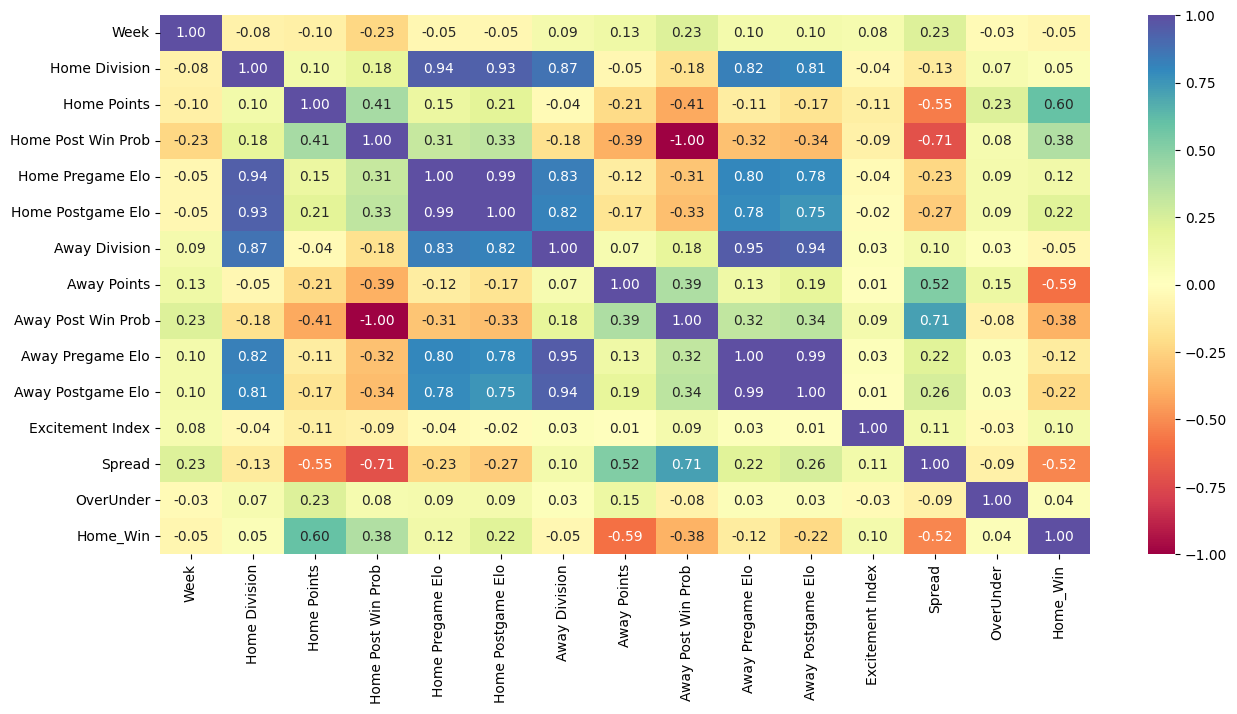

In [ ]:
numeric_data = win_loss.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Conclusions:

1.  There is a correlation of -1 with df['Home Pregame Elo'] = df['Home Team'].map(elo_dict) Post Win Probablility and Away Post Win Probablily.  Makes sense as only 1 winner and loser.

2.  Strong Corellation with Home Division and Pregame Elo, Postgame Elo, and Away Divsion.  

3.  Looks like fbs vs fcs and elos make a different.

**We have our data now.  Time to create a model**

In [ ]:
win_loss.head()

,Week,Start Date,Neutral Site,Conference Game,Home Team,Home Conference,Home Division,Home Points,Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Team,Away Conference,Away Division,Away Points,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Spread,OverUnder,Home_Win
1575,15,2024-12-08 01:00:00+00:00,True,True,Oregon,Big Ten,1,45.0,0.530185,1623.0,1635.0,Penn State,Big Ten,1,37.0,0.469815,1602.0,1590.0,6.113350,-3.5,52.0,1
1574,15,2024-12-08 01:00:00+00:00,True,True,SMU,ACC,1,31.0,0.565815,1604.0,1590.0,Clemson,ACC,1,34.0,0.434185,1558.0,1572.0,6.659001,-2.5,56.5,0
1573,15,2024-12-08 00:30:00+00:00,False,True,Louisiana,Sun Belt,1,3.0,0.515825,1574.0,1561.0,Marshall,Sun Belt,1,31.0,0.484175,1563.0,1576.0,2.851600,-5.0,58.0,0
1571,15,2024-12-07 21:00:00+00:00,True,True,Texas,SEC,1,19.0,0.534484,1607.0,1594.0,Georgia,SEC,1,22.0,0.465516,1583.0,1596.0,9.098891,-3.0,51.0,0
1572,15,2024-12-07 21:00:00+00:00,False,False,UC Davis,Big Sky,0,42.0,0.511511,1388.0,1400.0,Illinois State,MVFC,0,10.0,0.488489,1380.0,1368.0,5.330282,-10.5,55.5,1


In [ ]:
# function for metrics
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras



# Select features
features = ['Home Pregame Elo', 'Away Pregame Elo', 'Spread', 'OverUnder']
X = win_loss[features]
y = win_loss['Home_Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fit_history = model.fit(X_train, y_train,validation_split=0.1, verbose=1, epochs=10, batch_size=64)



Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6710 - loss: 0.6444 - val_accuracy: 0.6750 - val_loss: 0.6111
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7223 - loss: 0.5607 - val_accuracy: 0.6583 - val_loss: 0.5776
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7220 - loss: 0.5312 - val_accuracy: 0.6750 - val_loss: 0.5686
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7487 - loss: 0.5051 - val_accuracy: 0.6833 - val_loss: 0.5700
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 0.5040 - val_accuracy: 0.6833 - val_loss: 0.5747
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7344 - loss: 0.4936 - val_accuracy: 0.6833 - val_loss: 0.5772
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7514 - loss: 0.4898 - val_accuracy: 0.6833 - val_loss: 0.5787
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7697 - loss: 0.4673 - val_accuracy: 0.6833 - val_loss

In [ ]:
#  Make predictions on the testing data
y_pred1 = model.predict(X_test)

#  Make predictions on the testing data
y_train_pred = model.predict(X_train)





10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
new_data = post[features]
  # Replace with your actual new data

# 2. Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# 3. Make predictions using the trained model
predictions_prob = model.predict(new_data_scaled)  # Predicted probabilities
predictions = (predictions_prob > 0.5).astype(int)  # Predicted Home_Win (0 or 1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
post['Predicted_Probability'] = predictions_prob.flatten() # Ensures the shape is correct
post['Predicted_Home_Win'] = predictions.flatten()


In [ ]:
ordered_columns = ['Home Team', 'Away Team', 'Predicted_Home_Win', 'Predicted_Probability']
post_ordered = post[ordered_columns]
post_ordered['Predicted_Probability'] = post_ordered.apply(
    lambda row: 1 - row['Predicted_Probability'] if row['Predicted_Home_Win'] == 0 else row['Predicted_Probability'],
    axis=1
)

# Format Predicted_Probability with 4 decimal places
post_ordered['Predicted_Probability'] = post_ordered['Predicted_Probability'].map('{:.4f}'.format)
post_ordered = post_ordered.sort_values(by=['Predicted_Probability'], ascending=False)
# Print the formatted DataFrame
print(post_ordered.to_string())
# Use to_string() for better formatting in the output

               Home Team          Away Team  Predicted_Home_Win Predicted_Probability
30                  Army           Marshall                   1                0.9060
36              Ole Miss               Duke                   1                0.8666
7                Florida             Tulane                   1                0.8592
10                 Texas            Clemson                   1                0.8295
37           Texas State        North Texas                   1                0.7950
25                   TCU          Louisiana                   1                0.7899
3          James Madison   Western Kentucky                   1                0.7814
32              Michigan            Alabama                   0                0.7580
34              Illinois     South Carolina                   0                0.7527
11            Ohio State          Tennessee                   1                0.7397
8             Notre Dame            Indiana           